Consider factor graph with 6 nodes and 5 factors represented by the following matrix

\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 \\
    1 & 0 & 1 & 0 & 1 \\
    0 & 1 & 1 & 1 & 0 \\
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 1 & 0 
\end{bmatrix}

a)
The graph is singly connected

In [11]:
import numpy as np
import scipy as sc
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

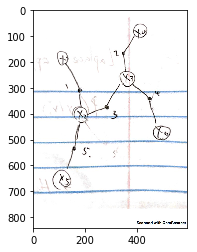

In [14]:
import matplotlib.image as img

image = img.imread("../hw2q1.jpg")

plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

In [491]:
G = np.array([[1,0,0,0,0],
              [1,0,1,0,1],
              [0,1,1,1,0],
              [0,1,0,0,0],
              [0,0,0,0,1],
             [0,0,0,1,0]])

G1 = np.array([[1,0,0,0,0,1,0,0,0,0,0],
              [1,0,1,0,1,0,1,0,0,0,0],
              [0,1,1,1,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,1,0,0,0,0,1,0],
             [0,0,0,1,0,0,0,0,0,0,1]])

F1 = np.ones((11,2,2))
F1[0,1,1] = 5
F1[1,0,1] = 0.5
F1[2,0,0] = 0
F1[3,0,0] = 2
for i in range(5,11):
    F1[i]=[[1,0],[0,1]]

F = np.ones((5,2,2))
F[0,1,1] = 5
F[1,0,1] = 0.5
F[2,0,0] = 0
F[3,0,0] = 2


In [493]:
F1

computeMarginals(G, F)

[25. 93.]
[ 16. 102.]
[54. 64.]
[68. 50.]
[59. 59.]
[68. 50.]


array([[0.21186441, 0.78813559],
       [0.13559322, 0.86440678],
       [0.45762712, 0.54237288],
       [0.57627119, 0.42372881],
       [0.5       , 0.5       ],
       [0.57627119, 0.42372881]])

In [ ]:
N = G.shape[0]
K = G.shape[1]
B = np.ones((N,2))
VF = np.ones((N,K,2))
FV = np.ones((K,N,2))
Vsent = np.zeros((N,K))
Fsent = np.zeros((K,N))


In [467]:
def computeMarginals(G=G, F=F):
    N = G.shape[0]
    K = G.shape[1]
    B = np.ones((N,2))
    VF = np.ones((N,K,2))
    FV = np.ones((K,N,2))
    Vsent = np.zeros((N,K))
    Fsent = np.zeros((K,N))
    
    def cansendvf(var, fac):    
        #check if a message can go from a var to factor
        if G[var,fac]==0:
            return False
        else:
            #if all the other factors connected to the variable have passed messages to the variable
            if np.all(np.delete(Fsent[:,var], fac, 0)==np.delete(G[var,:], fac, 0)):
                return True
            else:
                return False
        
    def cansendfv(fac, var):    
        #check if a message can go from factor to var
        if G[var,fac]==0:
            return False
        else:
            #if all the other variables connected to the factor have passed messages to the factor
            if np.all(np.delete(Vsent[:,fac], var, 0)==np.delete(G[:,fac], var, 0)):
                return True
            else:
                return False
    

    #forward messaging from leafs to root
    #get the leaves and initialize
    leafs_var = np.where(np.sum(G,1)==1)
    for leaf in np.nditer(leafs_var):
        for fac in range(K):
            if cansendvf(leaf, fac):
                Vsent[leaf, fac]=1
                VF[leaf, fac]=1

    while np.any(Vsent != G) or np.any(Fsent != G.T):
        for var in range(N):
            for fac in range(K):
                #first check whether a message was sent and whether it could be sent
                if Vsent[var, fac]==0 and cansendvf(var, fac):
                    Vsent[var, fac] = 1
                    nb_fac = np.where(G[var,:]==1)[0]
                    mu_prod = 1
                    #iterate over all the other factors connected to the variable
                    for nb in np.nditer(np.delete(nb_fac, np.where(nb_fac==fac))):
                        mu_prod *= FV[nb,var,:]
                    VF[var,fac,:] = mu_prod
                    #print("var", var, "to fac", fac, ":", VF[var,fac,:])
                if Fsent[fac, var]==0 and cansendfv(fac, var):
                    Fsent[fac, var] = 1
                    mu_prod = 1
                    F_sum = 0
                    nb_var = np.where(G[:,fac]==1)[0]
                    #iterate over the other variablaes connected to factor
                    for nb in np.nditer(np.delete(nb_var, np.where(nb_var==var))):
                        if var < nb:
                            FV[fac,var,:]=np.matmul(F[fac],VF[nb,fac,:])
                        else: 
                            FV[fac,var,:]=np.matmul(F[fac].T,VF[nb,fac,:])
                    #print("fac", fac, "to var", var, ":", FV[fac,var,:])


    for var in range(N):
        nb_facs = np.where(G[var,:]==1)
        for nb in np.nditer(nb_facs):  
            B[var,:] *= FV[nb, var, :]
        #print(B[var,:])
        B[var,:] = B[var,:]/sum(B[var,:])
    #print("VF:", VF)
    #print("FV:", FV)
    return(B)


computeMarginals(G,F)


[25. 93.]
[ 16. 102.]
[54. 64.]
[68. 50.]
[59. 59.]
[68. 50.]


array([[0.21186441, 0.78813559],
       [0.13559322, 0.86440678],
       [0.45762712, 0.54237288],
       [0.57627119, 0.42372881],
       [0.5       , 0.5       ],
       [0.57627119, 0.42372881]])

c)

If I only need to calculate one of the marginals, I just need to get the messages for the factors connecting to the variable.  In the code, this would mean that instead of checking that every message is passed for the while loop to end, I just set the condition so it runs until all messages from the neighbor factors have passed messages to the variable.

d) The results are the same as expected.  However, the computational time for the bruteforce is much longer, but that may be due to some bugs in jupyter notebook, since it is not actually enumerating over that many loops with this implementation. The problem seems to be coming from generating all the enumeration with the perm function, which appears to be computationally costly even though done recursively.  There may be python packages that speeds up the process and make things run a little smoother.

In [475]:
def perm(n):
    if n==0:
        return([[]])
    if n==1:
        return([[0],[1]])
    else:
        lis = []
        for i in range(len(perm(n-1))):
            lis.append(np.append(perm(n-1)[i],0))
            lis.append(np.append(perm(n-1)[i],1))
        return(np.array(lis))

def bruteforce(G=G, F=F):    
    N = G.shape[0]
    K = G.shape[1]
    B = np.zeros((N,2))
    Z=0
    for comb in perm(N):
        prod = 1
        for i in range(K):
            var = np.where(G[:,i]==1)[0]
            prod = prod*F[i,comb[var[0]],comb[var[1]]]
        for j in range(N):
            fac = np.where(G[j,:]==1)[0]
            B[j,comb[j]] += prod
        Z += prod
    
    for var in range(N):
        B[var,:] = B[var,:]/sum(B[var,:])
    return(B)

bruteforce(G,F)

array([[0.21186441, 0.78813559],
       [0.13559322, 0.86440678],
       [0.45762712, 0.54237288],
       [0.57627119, 0.42372881],
       [0.5       , 0.5       ],
       [0.57627119, 0.42372881]])

e)

Clearly do send a message indicating which variable has been observed, we need to add an additional factor to each variable.  In the textbook we saw that conditioninig is equivalent to multiplying the joint distribution by a product of indicator function $\Pi I(v_i, \hat{v}_i)$, so when marginalizing it will skip over the variables that are observed.  In the case of the sum product algorithm, using the example of $P(x_2|x_1=0)=\mu_{f_1x_2}\mu_{f_3x_2}\mu_{f_5x_2}$, with the additinal factor on $x_1$, $\mu_{f_1x_2} = \sum_{x_1}f_1(x_1,x_2)f_{1'}(x_1)=\sum_{x_1}f_1(x_1,x_2)I(x_1,x_{1observed})$, So the function that the new factor takes on is simply just the indicator function, which is equivalent to the Identity matrix in binary case.